In [57]:
import pandas as pd

file_path = '/Users/fmalacrida/Documents/GitHub/lab-eda-univariate/amz_uk_price_prediction_dataset.csv'

df = pd.read_csv('/Users/fmalacrida/Documents/GitHub/lab-eda-univariate/amz_uk_price_prediction_dataset.csv')

print(df.head())
category_counts = df['category'].value_counts()

print(category_counts)

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  
category
Sports & Outdoors                         836265
Beauty                                     1931

Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1.1 Frequency Tables

Generate a frequency table for the product category.

In [96]:
print(df.columns)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


In [60]:
category_counts = df['category'].value_counts()

print(category_counts)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


Identify the top 5 most listed product categories.

In [64]:
top_5_categories = category_counts.head(5)

print("Top 5 Most Listed Product Categories:")
print(top_5_categories)

Top 5 Most Listed Product Categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


2. Visualizations:

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.


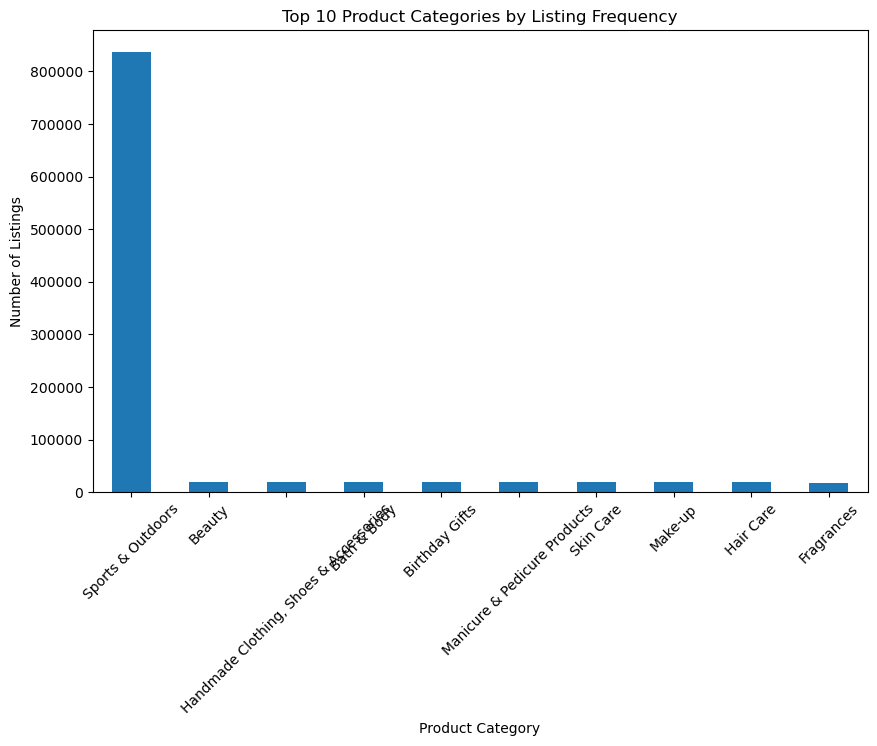

In [66]:
import matplotlib.pyplot as plt

top_10_categories = category_counts.head(10)
top_10_categories.plot(kind='bar', figsize=(10, 6))

plt.title('Top 10 Product Categories by Listing Frequency')
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


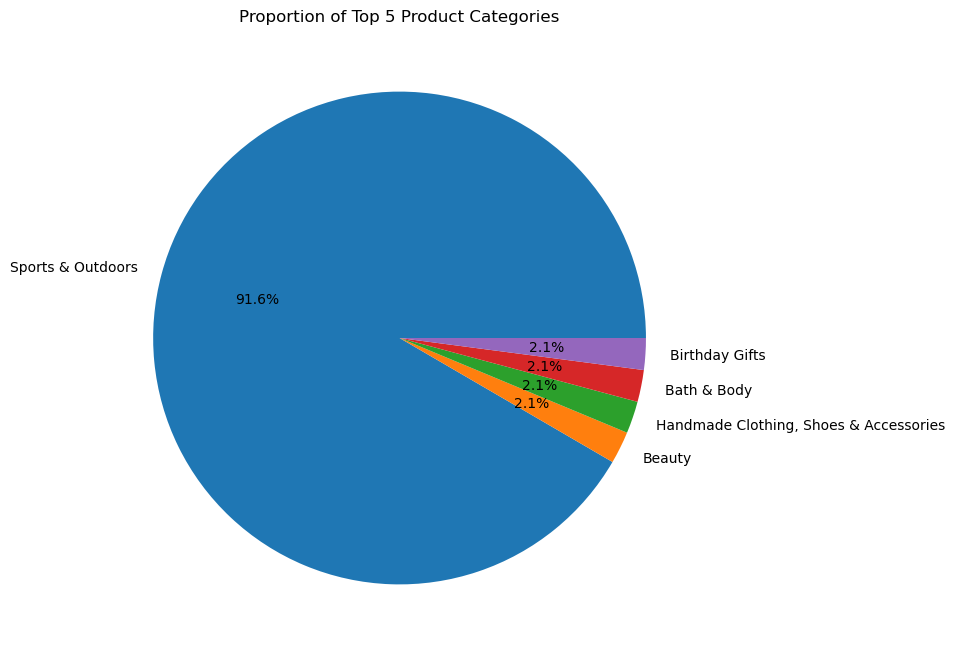

In [68]:
top_5_categories.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))

plt.title('Proportion of Top 5 Product Categories')
plt.ylabel('')
plt.show()

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

- Calculate the mean, median, and mode for the price of products.


In [70]:
price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode = df['price'].mode()[0]

print(f"Mean Price: £{price_mean:.2f}")
print(f"Median Price: £{price_median:.2f}")
print(f"Mode Price: £{price_mode:.2f}")

Mean Price: £89.24
Median Price: £19.09
Mode Price: £9.99


What's the average price point of products listed? How does this compare with the most common price point (mode)?

Mean price is 89.24. Mode price is 9.99, which means that the majority of the items are cheaper while just a few items are highly priced. Amazon likely fosters customer loyalty by frequently offering lower-priced items and implementing a strategy that encourages habitual purchasing.


Measures of Dispersion:

- Determine the variance, standard deviation, range, and interquartile range for product price.


In [72]:
price_variance = df['price'].var()
price_std = df['price'].std()

price_range = df['price'].max() - df['price'].min()

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
price_iqr = Q3 - Q1

print(f"Price Variance: {price_variance:.2f}")
print(f"Price Standard Deviation: {price_std:.2f}")
print(f"Price Range: £{price_range:.2f}")
print(f"Price Interquartile Range (IQR): £{price_iqr:.2f}")

Price Variance: 119445.49
Price Standard Deviation: 345.61
Price Range: £100000.00
Price Interquartile Range (IQR): £36.00


How varied are the product prices? Are there any indicators of a significant spread in prices?

The significant spread in prices is primarily driven by outliers, as the IQR indicates that the majority of the prices are close together. This variation is likely due luxury or premium products.

3. Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..


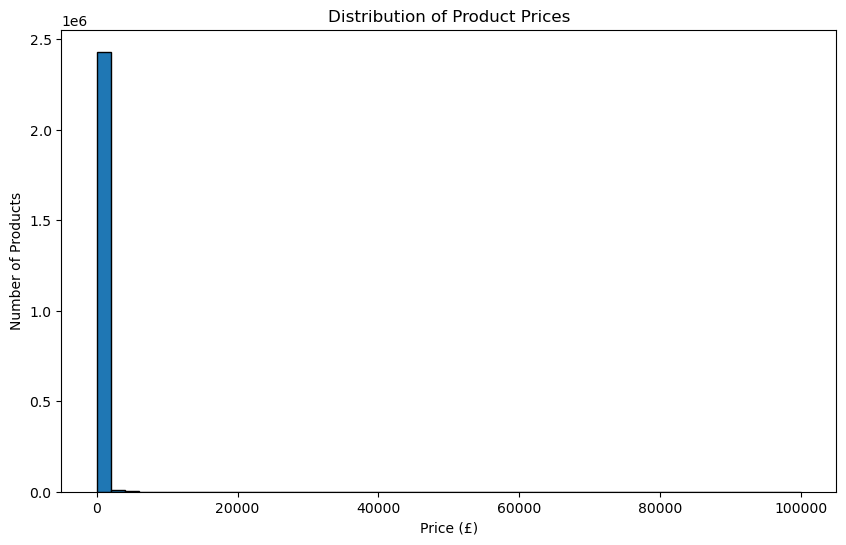

In [74]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, edgecolor='k')

plt.title('Distribution of Product Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.show()

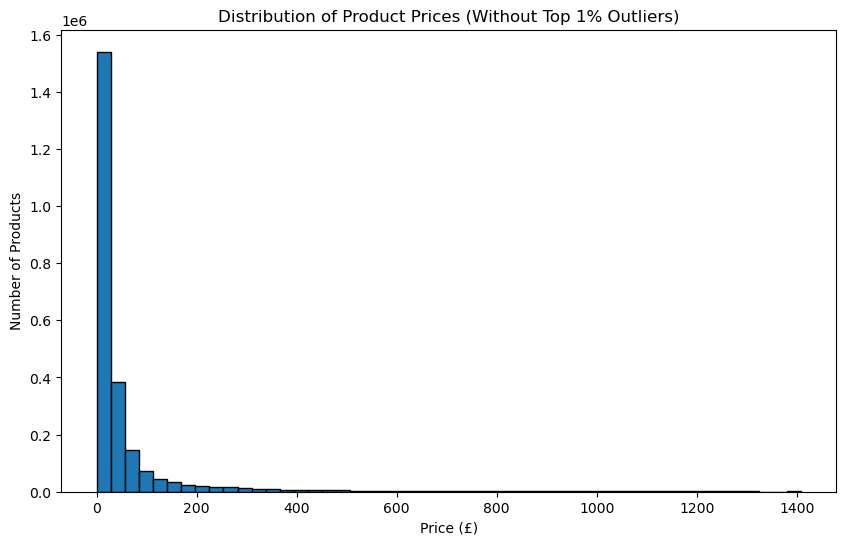

In [76]:
price_99 = df['price'].quantile(0.99)
df_filtered = df[df['price'] <= price_99]

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['price'], bins=50, edgecolor='k')

plt.title('Distribution of Product Prices (Without Top 1% Outliers)')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.show()

Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


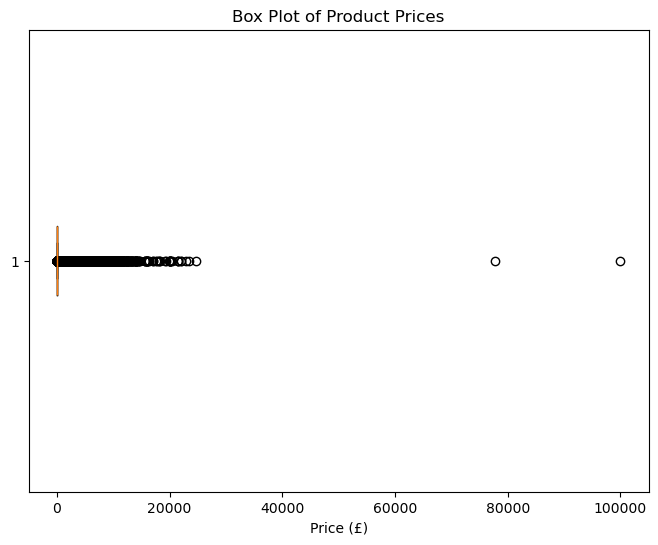

In [78]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False)

plt.title('Box Plot of Product Prices')
plt.xlabel('Price (£)')
plt.show()

Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.


In [98]:
rating_mean = df['reviews'].mean()
rating_median = df['reviews'].median()
rating_mode = df['reviews'].mode()[0]

print(f"Mean Rating: {rating_mean:.2f}")
print(f"Median Rating: {rating_median:.2f}")
print(f"Mode Rating: {rating_mode}")

Mean Rating: 480.63
Median Rating: 0.00
Mode Rating: 0


How do customers generally rate products? Is there a common trend?

On average, products have approximately 481 reviews. But most of the products have no reviews.


Measures of Dispersion:

- Determine the variance, standard deviation, and interquartile range for product rating.


In [116]:
reviews_variance = df['reviews'].var()
reviews_std = df['reviews'].std()

Q1 = df['reviews'].quantile(0.25)
Q3 = df['reviews'].quantile(0.75)
reviews_iqr = Q3 - Q1

print(f"Reviews Variance: {reviews_variance:.2f}")
print(f"Reviews Standard Deviation: {reviews_std:.2f}")
print(f"Reviews Interquartile Range (IQR): {reviews_iqr:.2f}")

Reviews Variance: 35332611.92
Reviews Standard Deviation: 5944.12
Reviews Interquartile Range (IQR): 59.00


Are the ratings consistent, or is there a wide variation in customer feedback?

I can only check the review column. Theres no rating column like the exercise sugests.

Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.


In [118]:
from scipy.stats import skew, kurtosis

reviews_data = df['reviews'][df['reviews'] > 0]

reviews_skewness = skew(reviews_data)
reviews_kurtosis = kurtosis(reviews_data)

print(f"Reviews Skewness: {reviews_skewness:.2f}")
print(f"Reviews Kurtosis: {reviews_kurtosis:.2f}")

Reviews Skewness: 73.14
Reviews Kurtosis: 8941.93


Are the ratings normally distributed, or do they lean towards higher or lower values?

I can only check the review column. Theres no rating column like the exercise sugests.

Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


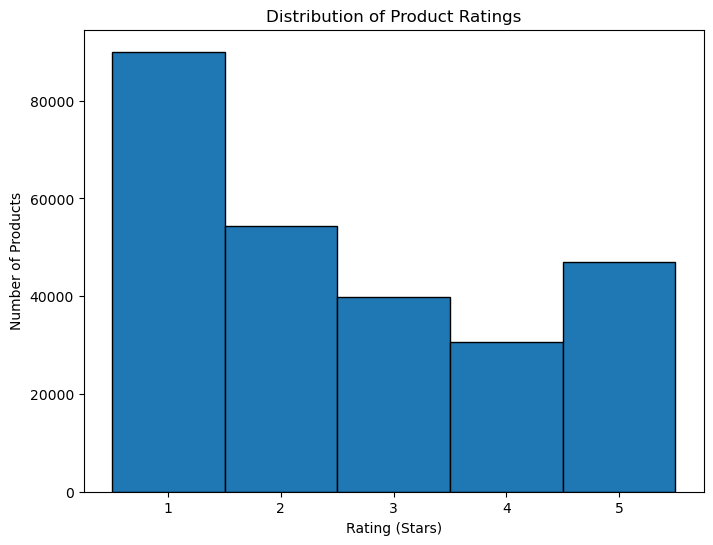

In [122]:
plt.figure(figsize=(8, 6))
plt.hist(df['reviews'], bins=range(1, 7), edgecolor='k', align='left')

plt.title('Distribution of Product Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Products')
plt.xticks(range(1, 6))
plt.show()

1 star ratings are the most comum.